In [2]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image


def get_all_korean():

    def nextKorLetterFrom(letter):
        lastLetterInt = 15572643
        if not letter:
            return '가'
        a = letter
        b = a.encode('utf8')
        c = int(b.hex(), 16)

        if c == lastLetterInt:
            return False

        d = hex(c + 1)
        e = bytearray.fromhex(d[2:])

        flag = True
        while flag:
            try:
                r = e.decode('utf-8')
                flag = False
            except UnicodeDecodeError:
                c = c+1
                d = hex(c)
                e = bytearray.fromhex(d[2:])
        return e.decode()

    returns = []
    flag = True
    k = ''
    while flag:
        k = nextKorLetterFrom(k)
        if k is False:
            flag = False
        else:
            returns.append(k)
    return returns

def merge_img(img0, img1, img2):
    mmg = Image.new("L", (128*2, 128*2), 255)
    mmg.paste(img0, (0,0))
    mmg.paste(img1, (128,0))
    if img2 is not None:
        mmg.paste(img2, (64,128))
    return mmg.resize((96,96), Image.BILINEAR)

def get_imgs(fd, font, tag, letter):
    
    ch1_list = ['ㄱ', 'ㄱㄱ', 'ㄴ', 'ㄷ', 'ㄷㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅂㅂ', 'ㅅ', 'ㅅㅅ', 'ㅇ', 'ㅈ', 'ㅈㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
    ch2_list = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
    ch3_list = [None, 'ㄱ', 'ㄱㄱ', 'ㄱㅅ', 'ㄴ', 'ㄴㅈ', 'ㄴㅎ', 'ㄷ', 'ㄹ', 'ㄹㄱ', 'ㄹㅁ', 'ㄹㅂ', 'ㄹㅅ', 'ㄹㅌ', 'ㄹㅍ', 'ㄹㅎ', 'ㅁ', 'ㅂ', 'ㅂㅅ', 'ㅅ', 'ㅅㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

    
    ch1 = (ord(letter) - ord('가'))//588
    ch2 = ((ord(letter) - ord('가')) - (588*ch1)) // 28
    ch3 = (ord(letter) - ord('가')) - (588*ch1) - 28*ch2

    return (
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch1_list[ch1]}.png"),
        Image.open(f"{fd}/{font}/{font}__{tag}__{ch2_list[ch2]}.png"),
        None if ch3_list[ch3] is None else Image.open(f"{fd}/{font}/{font}__{tag}__{ch3_list[ch3]}.png"),
    )

In [3]:
partfd = "/home/jupyter/ai_font/data/test_parts"
assemblefd = "/home/jupyter/ai_font/data/test_assembled"
ak = get_all_korean()

In [5]:
font = "플레이브밤비"
tag = "closing"
os.makedirs(f"{assemblefd}/{font}", exist_ok=True)
for letter in ak:
    try:
        img0, img1, img2 = get_imgs(partfd, font, tag, letter)
        img = merge_img(img0,img1,img2)
        img.save(f"{assemblefd}/{font}/{font}__{tag}__{letter}.png")
    except FileNotFoundError:
        print(letter)

걔
걕
걖
걗
걘
걙
걚
걛
걜
걝
걞
걟
걠
걡
걢
걣
걤
걥
걦
걧
걨
걩
걪
걫
걬
걭
걮
걯
게
겍
겎
겏
겐
겑
겒
겓
겔
겕
겖
겗
겘
겙
겚
겛
겜
겝
겞
겟
겠
겡
겢
겣
겤
겥
겦
겧
겨
격
겪
겫
견
겭
겮
겯
결
겱
겲
겳
겴
겵
겶
겷
겸
겹
겺
겻
겼
경
겾
겿
곀
곁
곂
곃
교
굑
굒
굓
굔
굕
굖
굗
굘
굙
굚
굛
굜
굝
굞
굟
굠
굡
굢
굣
굤
굥
굦
굧
굨
굩
굪
굫
규
귝
귞
귟
균
귡
귢
귣
귤
귥
귦
귧
귨
귩
귪
귫
귬
귭
귮
귯
귰
귱
귲
귳
귴
귵
귶
귷
그
극
귺
귻
근
귽
귾
귿
글
긁
긂
긃
긄
긅
긆
긇
금
급
긊
긋
긌
긍
긎
긏
긐
긑
긒
긓
꺠
꺡
꺢
꺣
꺤
꺥
꺦
꺧
꺨
꺩
꺪
꺫
꺬
꺭
꺮
꺯
꺰
꺱
꺲
꺳
꺴
꺵
꺶
꺷
꺸
꺹
꺺
꺻
께
껙
껚
껛
껜
껝
껞
껟
껠
껡
껢
껣
껤
껥
껦
껧
껨
껩
껪
껫
껬
껭
껮
껯
껰
껱
껲
껳
껴
껵
껶
껷
껸
껹
껺
껻
껼
껽
껾
껿
꼀
꼁
꼂
꼃
꼄
꼅
꼆
꼇
꼈
꼉
꼊
꼋
꼌
꼍
꼎
꼏
꾜
꾝
꾞
꾟
꾠
꾡
꾢
꾣
꾤
꾥
꾦
꾧
꾨
꾩
꾪
꾫
꾬
꾭
꾮
꾯
꾰
꾱
꾲
꾳
꾴
꾵
꾶
꾷
뀨
뀩
뀪
뀫
뀬
뀭
뀮
뀯
뀰
뀱
뀲
뀳
뀴
뀵
뀶
뀷
뀸
뀹
뀺
뀻
뀼
뀽
뀾
뀿
끀
끁
끂
끃
끄
끅
끆
끇
끈
끉
끊
끋
끌
끍
끎
끏
끐
끑
끒
끓
끔
끕
끖
끗
끘
끙
끚
끛
끜
끝
끞
끟
냬
냭
냮
냯
냰
냱
냲
냳
냴
냵
냶
냷
냸
냹
냺
냻
냼
냽
냾
냿
넀
넁
넂
넃
넄
넅
넆
넇
네
넥
넦
넧
넨
넩
넪
넫
넬
넭
넮
넯
넰
넱
넲
넳
넴
넵
넶
넷
넸
넹
넺
넻
넼
넽
넾
넿
녀
녁
녂
녃
년
녅
녆
녇
녈
녉
녊
녋
녌
녍
녎
녏
념
녑
녒
녓
녔
녕
녖
녗
녘
녙
녚
녛
뇨
뇩
뇪
뇫
뇬
뇭
뇮
뇯
뇰
뇱
뇲
뇳
뇴
뇵
뇶
뇷
뇸
뇹
뇺
뇻
뇼
뇽
뇾
뇿
눀
눁
눂
눃
뉴
뉵
뉶
뉷
뉸
뉹
뉺
뉻
뉼
뉽
뉾
뉿
늀
늁
늂
늃
늄
늅
늆
늇
늈
늉
늊
늋
늌
늍
늎
늏
느
늑
늒
늓
는
늕
늖
늗
늘
늙
늚
늛
늜
늝
늞
늟
늠
늡
늢
늣
늤
능
늦
늧


In [ ]:
a = get_imgs("/home/jupyter/ai_font/data/train_parts", "트와이스나연", "dilate", "량")

In [6]:
len(os.listdir(f"{assemblefd}/{font}"))

7980

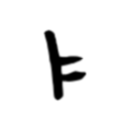

In [ ]:
a[1]

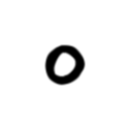

In [17]:
a[2]